In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns 

In [123]:
df1=pd.read_csv("/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")

In [124]:
df1.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [125]:
df1['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

# Sleep Apnea :
It is a sleep disorder characterized by pauses in breathing or instances of shallow or infrequent breathing during sleep. These pauses can last from a few seconds to minutes and may occur multiple times per hour. 
# Insomnia:
It is a sleep disorder characterized by difficulty falling asleep, staying asleep, or both, despite having the opportunity to sleep. 


In [126]:
df1.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [127]:
df1.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [128]:
df1.shape

(374, 13)

# more than 50% of the values in Sleep Disorder column are null
Replace these values with None, meaning the person dosen't have any disorder.

In [129]:
df1["Sleep Disorder"] = df1["Sleep Disorder"].fillna("None")

In [130]:
df1.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [131]:
df1.duplicated().sum() #no duplicates 

0

In [132]:
df=df1.copy()


Person id doesn't contribute to any meaningful insight, let's drop it.

In [133]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [134]:
df.drop(columns=["Person ID"],axis=1,inplace=True)

In [135]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [137]:
cat_columns=[]
num_columns=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_columns.append(i)
    else:
        num_columns.append(i)

print("categorical colums are:",cat_columns)
print("numerical columns are:",num_columns)
    

categorical colums are: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
numerical columns are: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


# Check the multicolinearity in the numerical variables 
1. By using correlation coefficient: this will give only the linear relationship  among the features.
2. more robust method is variance inflation factor(VIF) that captures the non linear relationship among the features.

In [138]:
corr=df[num_columns].corr()

<Axes: >

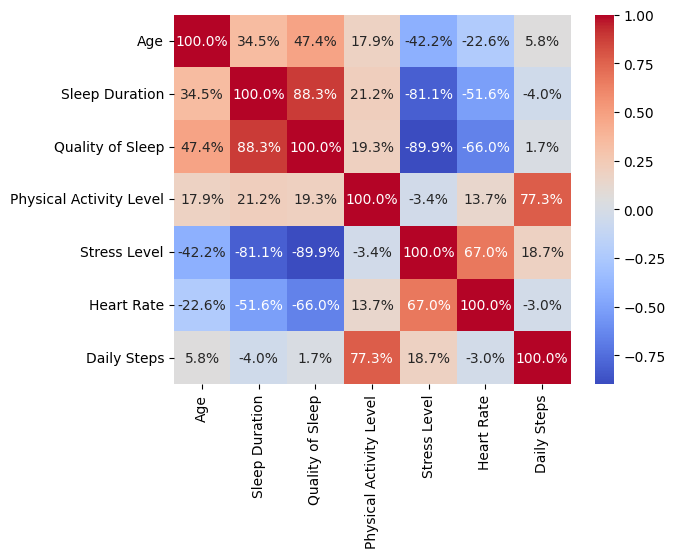

In [139]:
sns.heatmap(corr, annot=True, fmt=".1%", cmap='coolwarm')

# observations:
1. Daily steps is highly(>75%) correlated with Physical activity level.
2. Stress Level is highly( approx 75%) correlated with Heart Rate.
3. sleep duration is highly (approx 80%) correlated with quality of sleep.

In [140]:
import seaborn as sns

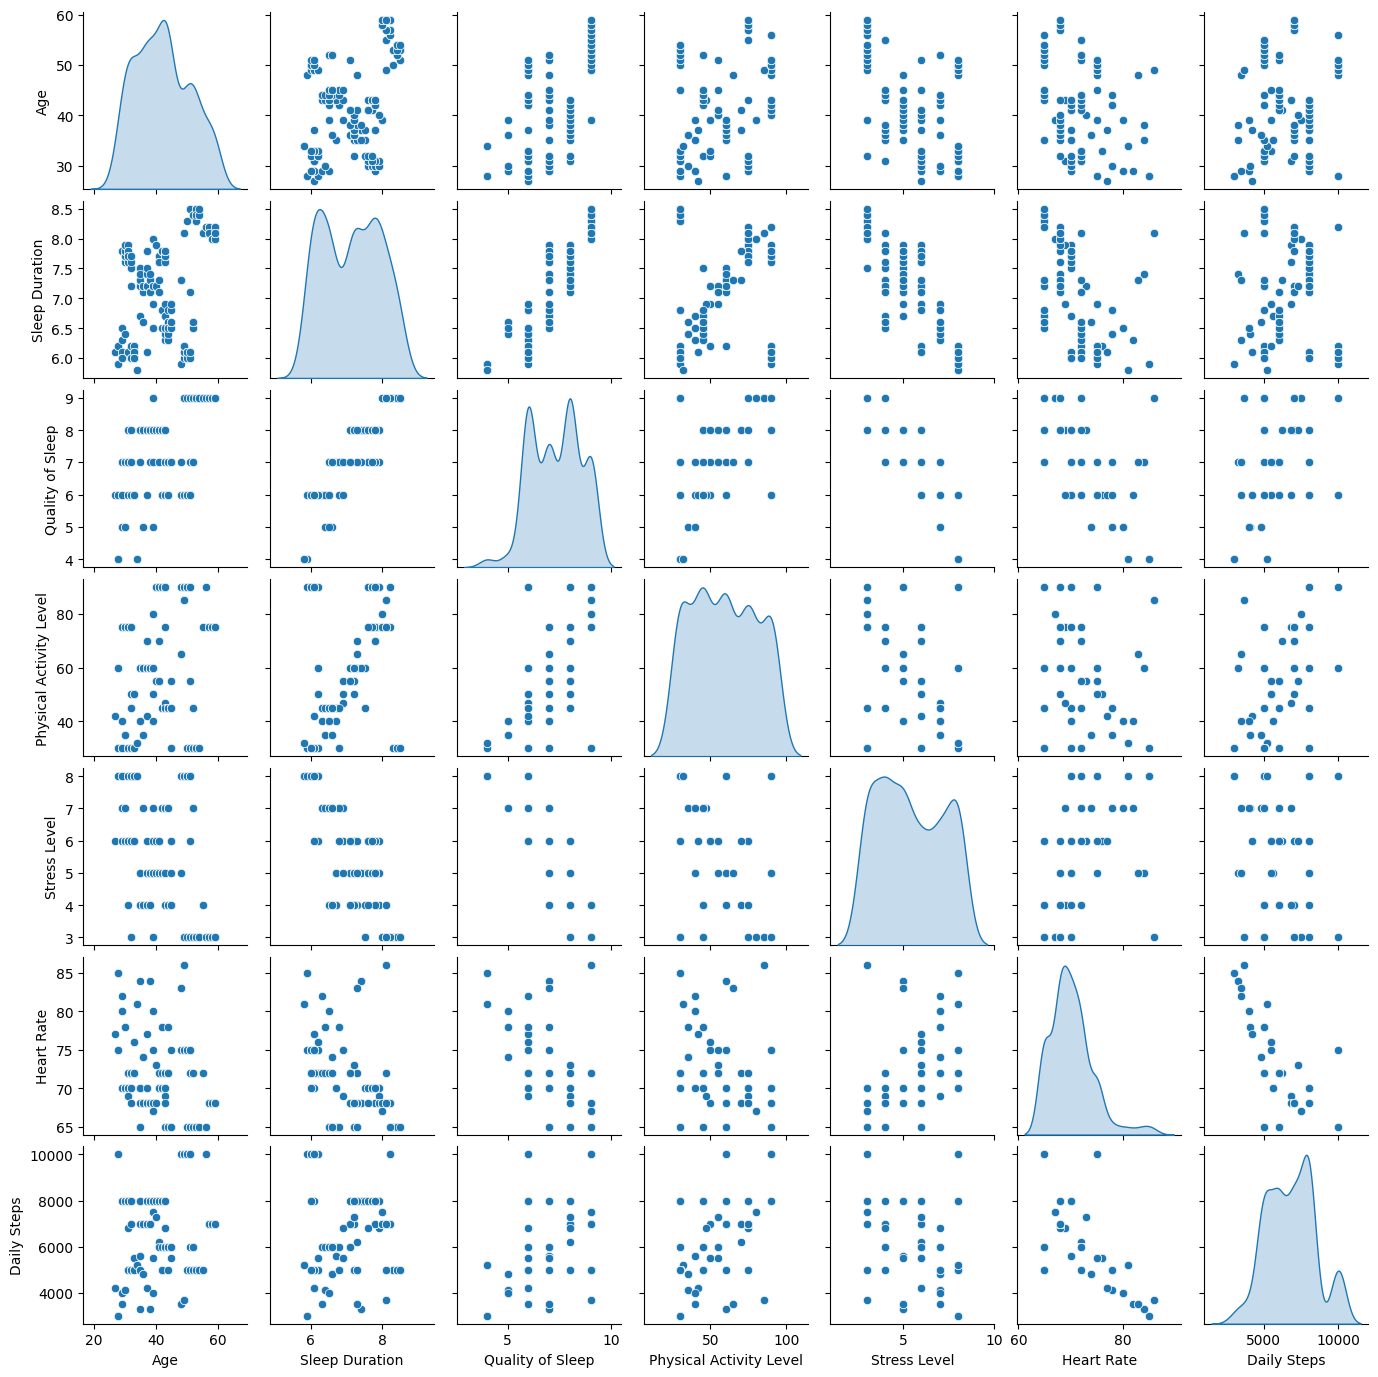

In [141]:

sns.pairplot(df[num_columns],diag_kind='kde',height=2)

In [142]:
! pip install statsmodels

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#col_index=0
def get_vif_filtered_features(df, num_columns, vif_threshold=6):
  """
  Calculates VIF for numerical features and returns a list of features to keep.

  Args:
      df (pandas.DataFrame): The DataFrame containing features.
      numerical_features (list): List of column names for numerical features.
      vif_threshold (float): Threshold for VIF (columns with VIF below this are kept).

  Returns:
      list: List of column names to keep based on VIF.
  """

  columns_to_keep = []
  for col_index, col_name in enumerate(num_columns):
      vif_data = df[num_columns.copy()]  # Create copy for each iteration
      vif_val = variance_inflation_factor(vif_data.drop(col_name, axis=1), col_index-1)
      print(f"{col_name} ------ {vif_val}")

      if vif_val < vif_threshold:
          columns_to_keep.append(col_name)

  # Drop high-VIF columns after the loop (avoids modifying data used for VIF calculation)
  df = df[columns_to_keep]
  return columns_to_keep, len(columns_to_keep)

# Example usage
vif_filtered_features, num_independent_features = get_vif_filtered_features(df.copy(), num_columns, vif_threshold=6)
print("Columns to be kept:", vif_filtered_features)
print('independent numerical columns:', num_independent_features)


Age ------ inf
Sleep Duration ------ 32.6410924373364
Quality of Sleep ------ 166.07604638336105
Physical Activity Level ------ 328.1362873948174
Stress Level ------ 23.062444631720147
Heart Rate ------ 20.1030421870286
Daily Steps ------ 299.4825689764612
Columns to be kept: []
independent numerical columns: 0


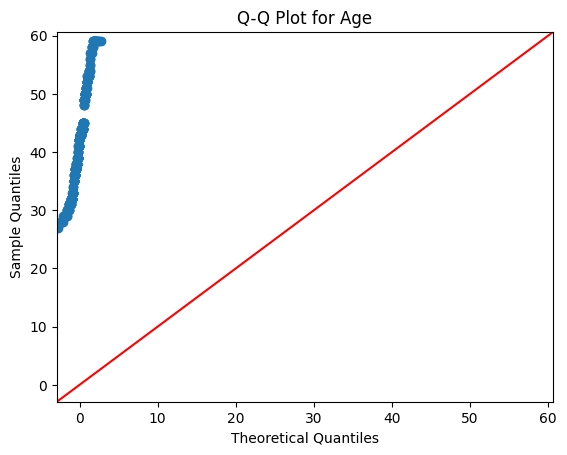

The data in column 'Age' does not appear to be normally distributed (p-value=0.0000)


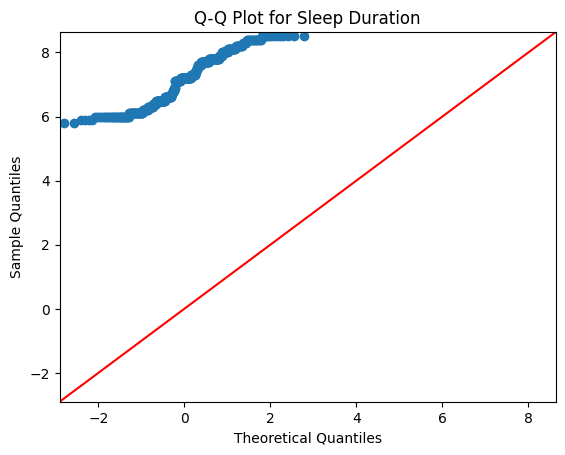

The data in column 'Sleep Duration' does not appear to be normally distributed (p-value=0.0000)


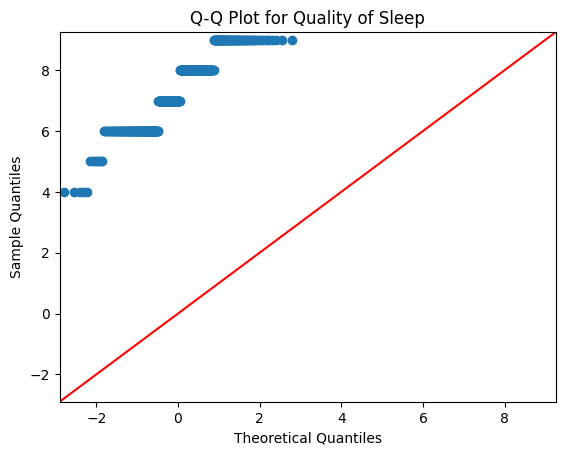

The data in column 'Quality of Sleep' does not appear to be normally distributed (p-value=0.0000)


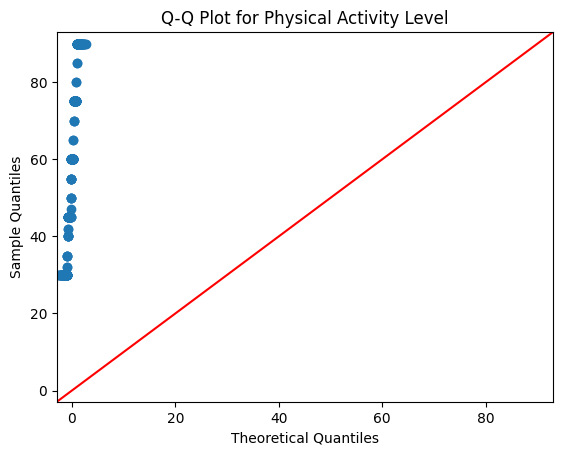

The data in column 'Physical Activity Level' does not appear to be normally distributed (p-value=0.0000)


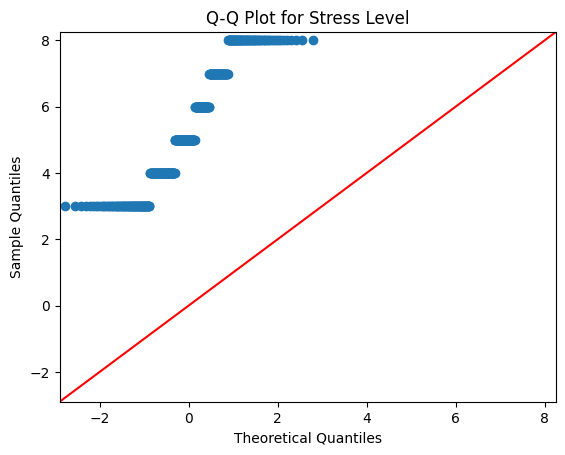

The data in column 'Stress Level' does not appear to be normally distributed (p-value=0.0000)


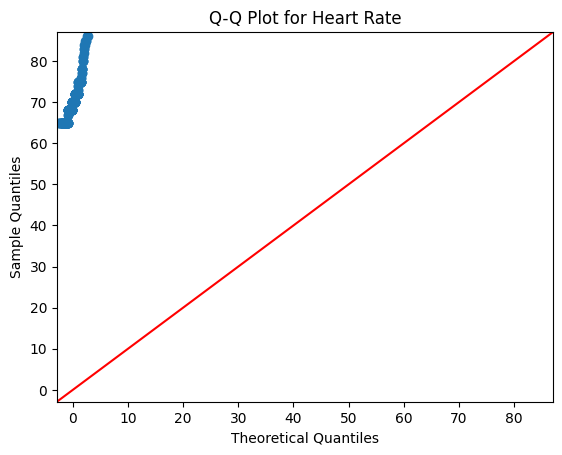

The data in column 'Heart Rate' does not appear to be normally distributed (p-value=0.0000)


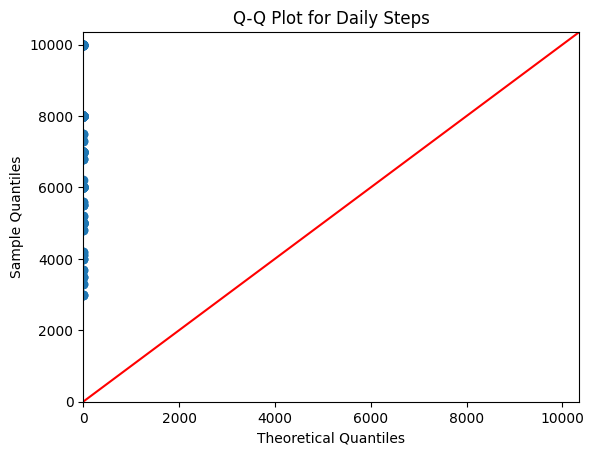

The data in column 'Daily Steps' does not appear to be normally distributed (p-value=0.0000)


In [144]:
# following function will check the normality of the data
import statsmodels.api as sm 
import scipy.stats as stats
import pylab as py 

def qq_plot_for_numerics(df, numeric_cols):
    
    for col in numeric_cols:
        data = df[col]
        sm.qqplot(data, line='45')
        py.title(f'Q-Q Plot for {col}')
        py.show()
        
        # Shapiro-Wilk test for normality
        shapiro_statistic, shapiro_p_value = stats.shapiro(data)
        if shapiro_p_value > 0.05:
            print(f"The data in column '{col}' appears to be normally distributed (p-value={shapiro_p_value:.4f})")
        else:
            print(f"The data in column '{col}' does not appear to be normally distributed (p-value={shapiro_p_value:.4f})")

# Assuming df is your DataFrame and num_columns is a list of numerical column names
qq_plot_for_numerics(df, num_columns)


Here data is not normally distributed and if we plan to use a classification algorithm that assumes normality, then we need to consider transforming the data to better approximate a normal distribution. Common transformations include logarithmic, square root, or Box-Cox transformations. Logistic regression, do assume that the input features are normally distributed. In such cases, violating the assumption of normality may lead to biased estimates and incorrect inferences.

Many classification algorithms, such as decision trees, random forests, support vector machines, and neural networks, are not based on assumptions about the distribution of the input features

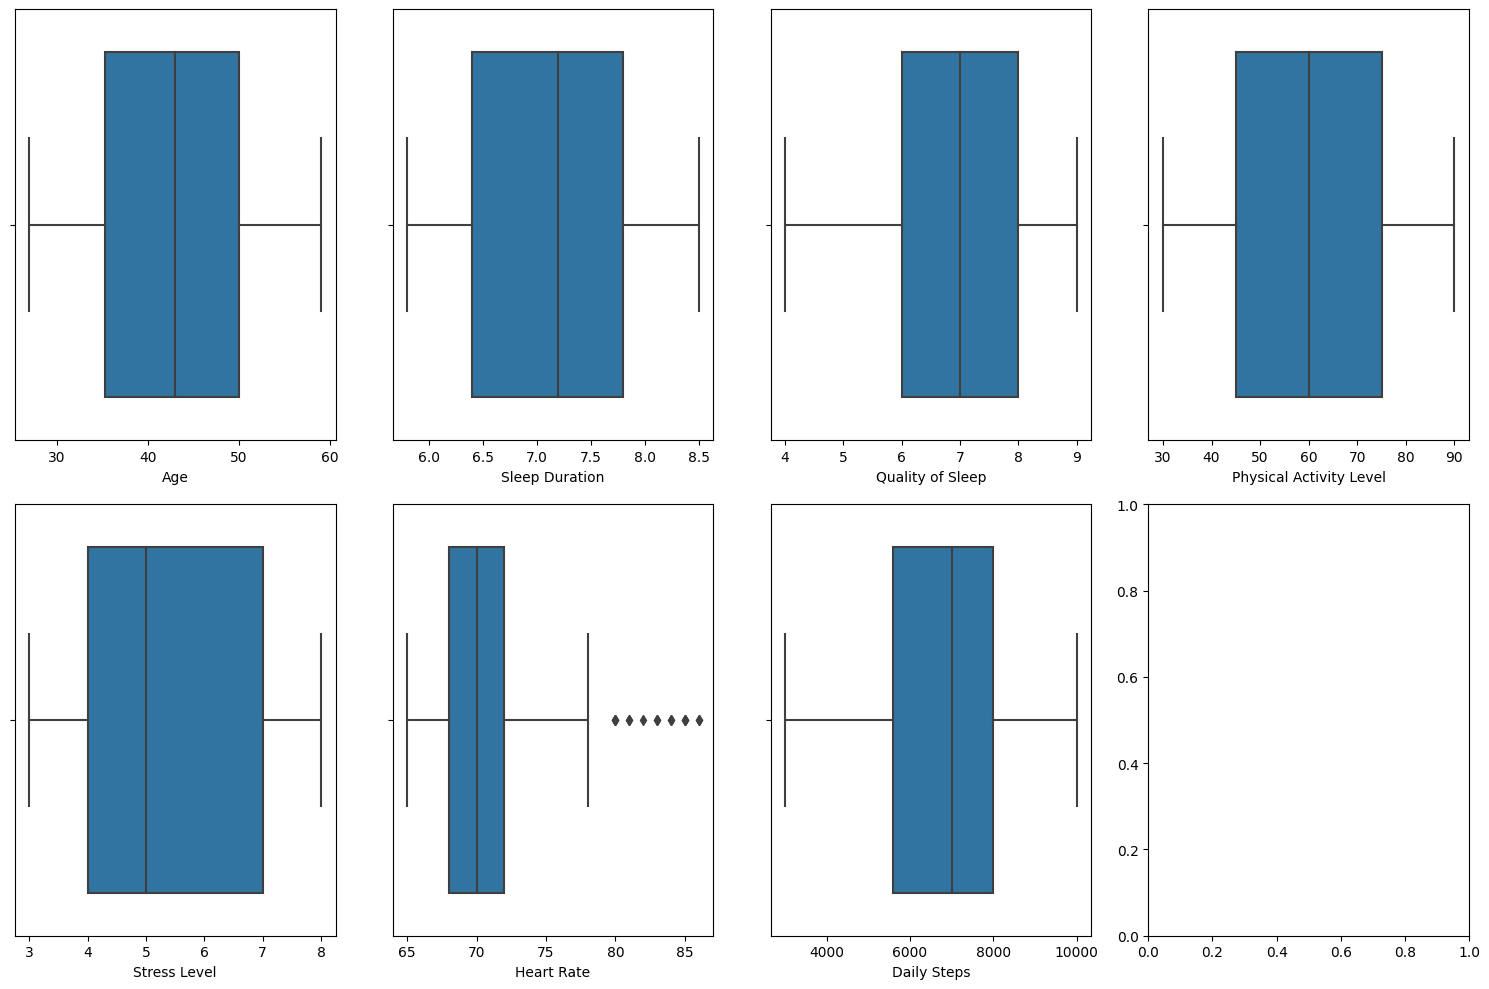

In [50]:
num_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Daily Steps']


fig, axes = plt.subplots(2, 4, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through numerical columns and plot box plots on the subplots
for i, column in enumerate(num_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    #axes[i].set_title(column)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



# Observations 
** ignore the last graph
1. age data is approximately normal distributed with median age around 43. 50% of the total age data lies between 35-50.
2. sleep duration is bit left skewed with median sleep duration 7.3 hours.
4. stress level is right shewed with median stress level of 5.
5. heart rate data contains outliers with  more than 73 heart rate. 
6. daily steps data is left skewed with median steps around 7000

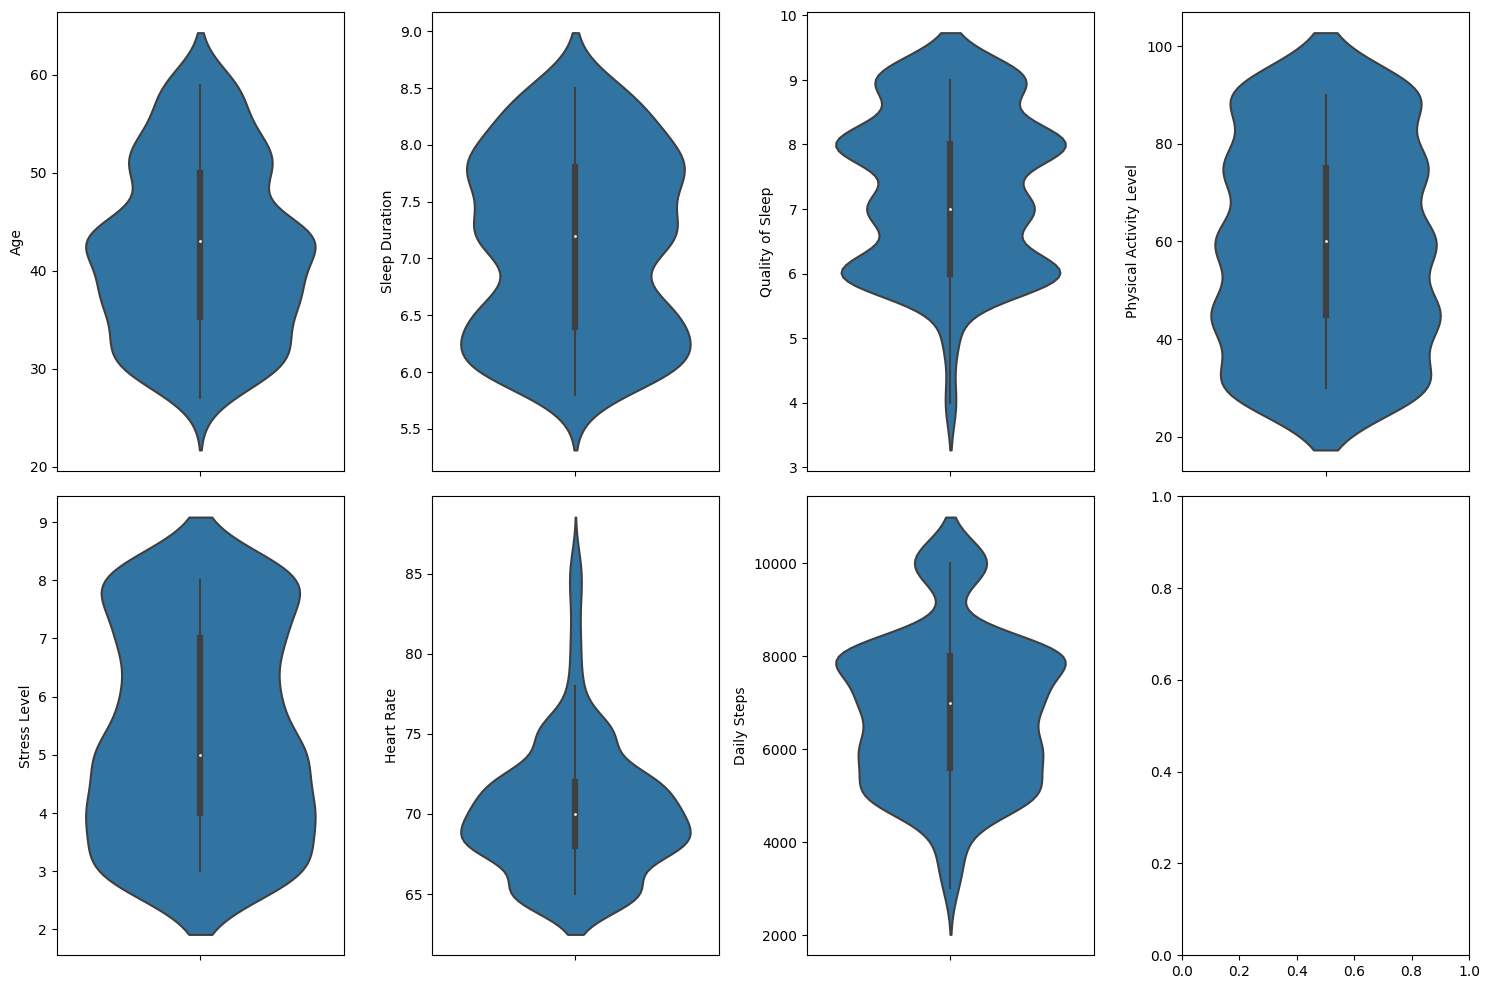

In [51]:

num_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Daily Steps']

fig, axes = plt.subplots(2, 4, figsize=(15, 10))

axes = axes.flatten()
for i, column in enumerate(num_columns):
    sns.violinplot(y=df[column], ax=axes[i])
    #axes[i].set_title(column)

plt.tight_layout()
plt.show()


1. Violin plot gave information about the distribution of data and about the existence of outliers if any.
2. sleep duration, quality of sleep, Physical activity level and srteess level are not unimodel data.there may be subgroups of individuals with different sleep patterns or stress levels based on demographic or behavioral factors.
3. It may be valuable to examine correlations with other variables, explore potential causal relationships which we also found out using VIF and heatmap.

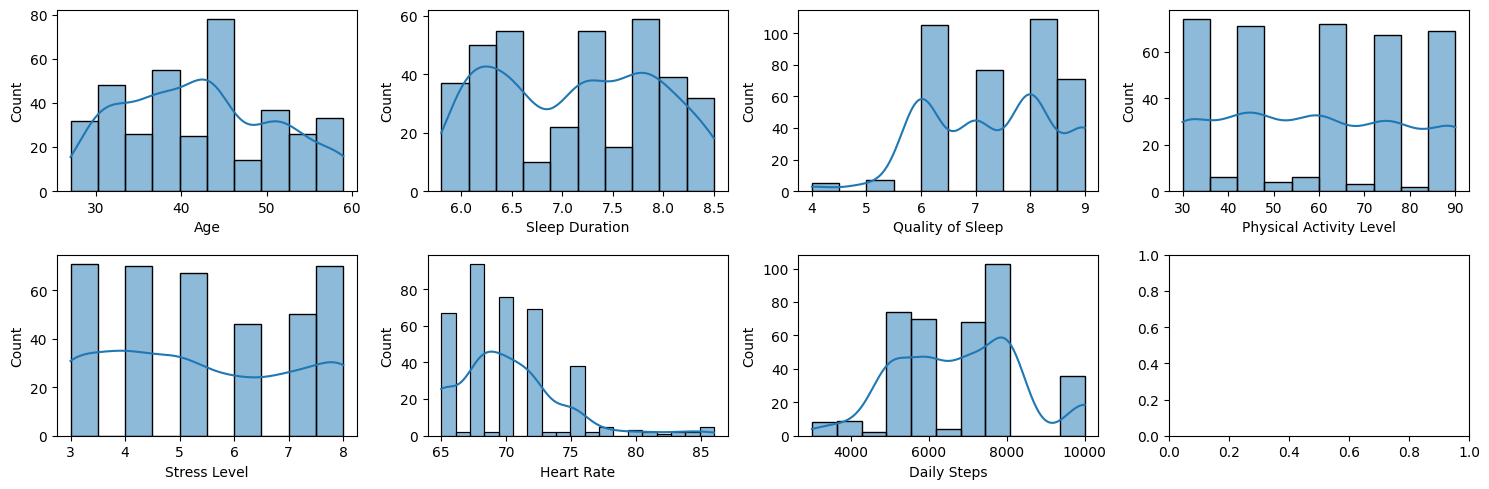

In [52]:
num_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate','Daily Steps']

fig, axes = plt.subplots(2, 4, figsize=(15, 5))
axes = axes.flatten()

for i, column in enumerate(num_columns):
    sns.histplot(df[column], ax=axes[i], kde=True)
    
plt.tight_layout()
plt.show()

clearly except Age, Stress level and Heart rate rest are not unimodel. 

# Analysis for Categorical columns 

In [145]:
cat_columns=['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

In [146]:
for i, column in enumerate(cat_columns):
    val_count = df[column].value_counts()
    print(column,":",val_count,"\n")
    print("\n")

Gender : Gender
Male      189
Female    185
Name: count, dtype: int64 



Occupation : Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64 



BMI Category : BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64 



Blood Pressure : Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64 



Sleep Disorder : Sleep Disorder
None          

In [147]:
def categorize_blood_pressure(blood_pressure):
    systolic, diastolic = map(int, blood_pressure.split('/'))
    if systolic < 130 and diastolic < 80:
        return 'Normal'
    elif 130 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Hypertension_Stage1'
    elif systolic >= 140 or diastolic >= 90:
        return 'Hypertension_Stage2'
    else:
        return 'Unknown'

df['Blood Pressure']=df['Blood Pressure'].apply(categorize_blood_pressure)
df.head(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,Hypertension_Stage1,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,Hypertension_Stage1,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,Hypertension_Stage1,75,10000,None


In [148]:
df['Blood Pressure'].unique()
print(df['Blood Pressure'].value_counts())

Blood Pressure
Hypertension_Stage1    261
Hypertension_Stage2     71
Normal                  42
Name: count, dtype: int64


In [149]:
df['Occupation'] = df['Occupation'].replace(['Software Engineer','Engineer','Lawyer','Doctor', 'Scientist','Accountant','Sales Representative', 'Manager'], 'Others')
df['BMI Category']=df['BMI Category'].replace(['Normal'],"Normal Weight")


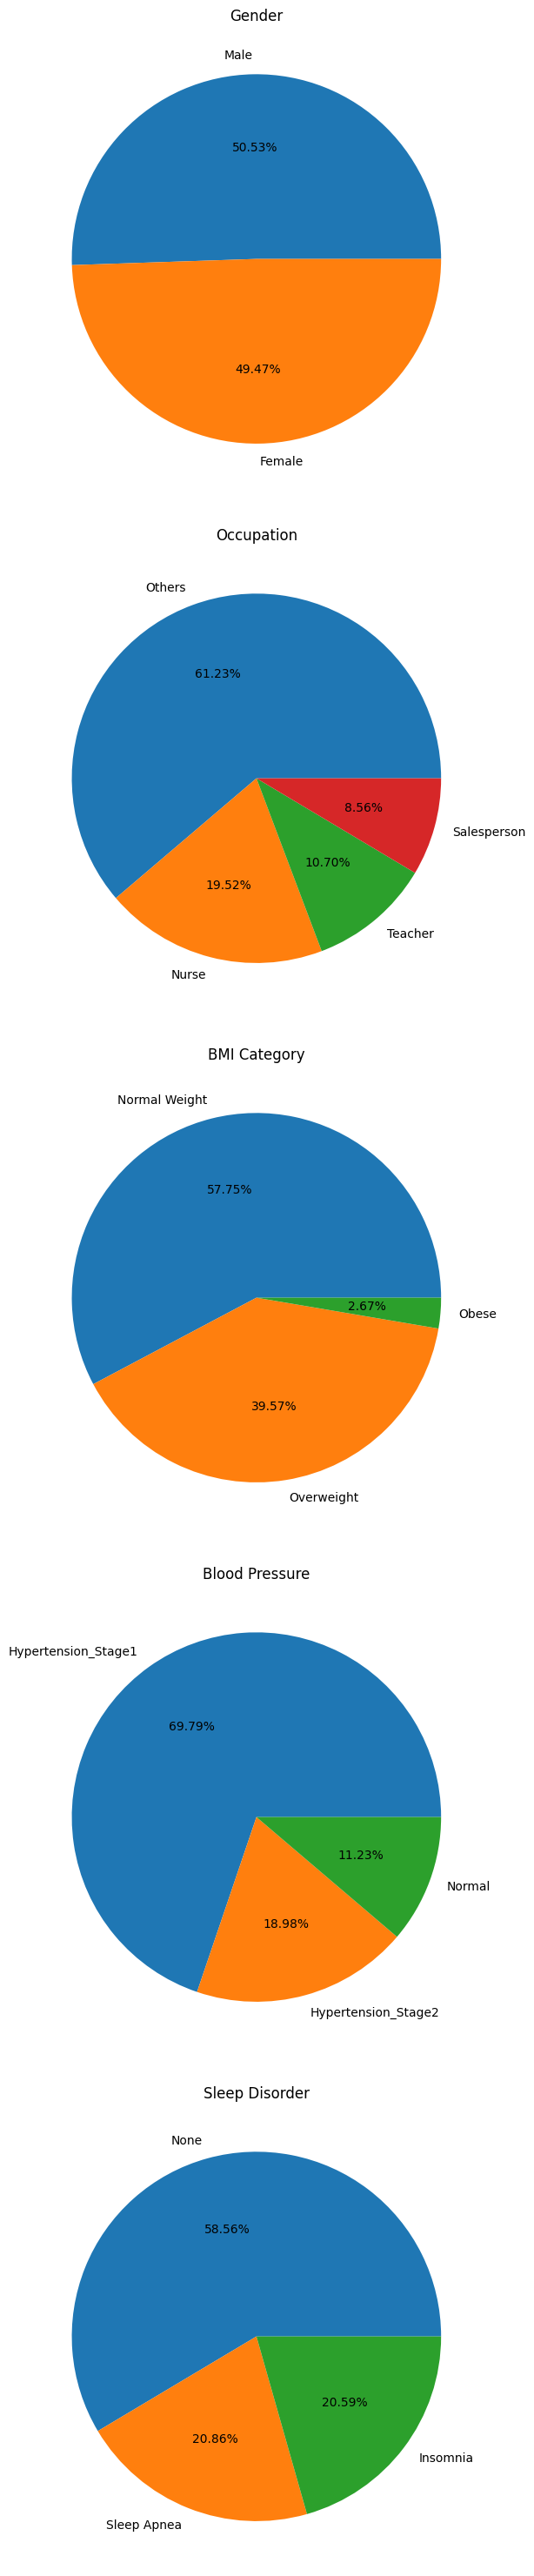

In [60]:
fig, axes = plt.subplots(len(cat_columns), 1, figsize=(6, 6 * len(cat_columns)))  # Adjust the figsize as needed

# Loop through categorical columns and plot pie charts on the subplots
for i, column in enumerate(cat_columns):
    val_count = df[column].value_counts()
    axes[i].pie(val_count, labels=val_count.index, autopct='%2.2f%%')
    axes[i].set_title(column)

# Adjust spacing between subplots
plt.tight_layout()


<Axes: xlabel='Sleep Disorder', ylabel='count'>

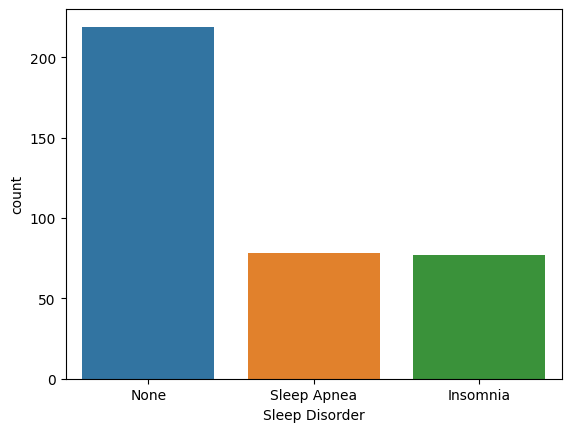

In [150]:
import seaborn as sns

sns.countplot(data=df, x='Sleep Disorder')


In [62]:
print(df['Sleep Disorder'].value_counts())
print(df['Sleep Disorder'].isna().value_counts())

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64
Sleep Disorder
False    374
Name: count, dtype: int64


from Pi chart as well as from above countplot it is clear target column Sleep Disorder have approximately equal number of 
Sleep Apnea    78
Insomnia       77,  but it also have aroud 219 values without any sleep disorder. Clearly our target column is imbalanced. we will apply upper sampling later on.


In [151]:
df2=df.copy()


In [152]:
import numpy as np

# Data Preprocessing and Data transformation

In [153]:
df2.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Others,6.1,6,42,6,Overweight,Hypertension_Stage1,77,4200,None
1,Male,28,Others,6.2,6,60,8,Normal Weight,Hypertension_Stage1,75,10000,None
2,Male,28,Others,6.2,6,60,8,Normal Weight,Hypertension_Stage1,75,10000,None
3,Male,28,Others,5.9,4,30,8,Obese,Hypertension_Stage2,85,3000,Sleep Apnea
4,Male,28,Others,5.9,4,30,8,Obese,Hypertension_Stage2,85,3000,Sleep Apnea


In [154]:
cat_columns=[]
num_columns=[]
for i in df2.columns:
    if df2[i].dtypes=='object':
        cat_columns.append(i)
    else:
        num_columns.append(i)

print("categorical colums are:",cat_columns)
print("numerical columns are:",num_columns)
    

categorical colums are: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
numerical columns are: ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


In [67]:
for i in cat_columns:
    print("\n",df2[i].value_counts())


 Gender
Male      189
Female    185
Name: count, dtype: int64

 Occupation
Others         229
Nurse           73
Teacher         40
Salesperson     32
Name: count, dtype: int64

 BMI Category
Normal Weight    216
Overweight       148
Obese             10
Name: count, dtype: int64

 Blood Pressure
Hypertension_Stage1    261
Hypertension_Stage2     71
Normal                  42
Name: count, dtype: int64

 Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [155]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler

In [156]:
df2['BMI Category'] = df2['BMI Category'].replace(['Normal Weight', 'Overweight', 'Obese'], [1, 2, 3])
df2['Blood Pressure'] = df2['Blood Pressure'].replace(['Normal', 'Hypertension_Stage1', 'Hypertension_Stage2'], [1, 2, 3])
df2['Sleep Disorder'] = df2['Sleep Disorder'].replace(['None','Sleep Apnea', 'Insomnia'], [0, 1,2])


In [157]:
df2.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Others,6.1,6,42,6,2,2,77,4200,0
1,Male,28,Others,6.2,6,60,8,1,2,75,10000,0
2,Male,28,Others,6.2,6,60,8,1,2,75,10000,0
3,Male,28,Others,5.9,4,30,8,3,3,85,3000,1
4,Male,28,Others,5.9,4,30,8,3,3,85,3000,1


In [158]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df2,test_size=0.2,random_state=43)

In [159]:

#label_encode = ['BMI Category',"Blood Pressure","Sleep Disorder"]
one_hot_encode = ['Occupation', 'Gender']
numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']
label_encode=['BMI Category','Blood Pressure','Sleep Disorder']

# Create the column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num_encode', StandardScaler(), numeric_features),
    ('one_hot_encode', OneHotEncoder(drop='first'), one_hot_encode)
], remainder='passthrough')


df_train_encoded = preprocessor.fit_transform(df_train)
df_test_encoded = preprocessor.transform(df_test)

In [161]:
columns = numeric_features  + ['Occupation_2', 'Occupation_3', 'Occupation_4', 'Gender_2']+ label_encode # Update with correct column names after one-hot encoding
train_df = pd.DataFrame(df_train_encoded, columns=columns)
test_df = pd.DataFrame(df_test_encoded, columns=columns)

train_df.head()

print(train_df.shape)

(299, 14)


In [162]:
test_df.shape

(75, 14)

In [163]:
X_train=train_df.iloc[:,:-1]
y_train=train_df.iloc[:,-1]
print(X_train.shape)
print(y_train.shape)

(299, 13)
(299,)


In [164]:
X_train.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Occupation_2',
       'Occupation_3', 'Occupation_4', 'Gender_2', 'BMI Category',
       'Blood Pressure'],
      dtype='object')

In [165]:
#Upper sampling the minority classes
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Class distribution before oversampling:", Counter(y_train))

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train))

Class distribution before oversampling: Counter({0.0: 182, 2.0: 59, 1.0: 58})
Class distribution after oversampling: Counter({0.0: 182, 2.0: 182, 1.0: 182})


In [166]:
X_test=test_df.iloc[:,:-1]
y_test=test_df.iloc[:,-1]
print(X_test.shape)
print(y_test.shape)

(75, 13)
(75,)


In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier



In [168]:
from sklearn.metrics import accuracy_score

# Create a dictionary of models with default parameters
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier(),
    "Support Vector Machine": SVC(),
    "Gaussian Naive Bayes": GaussianNB(),
    #"Multi-layer Perceptron": MLPClassifier()
}

# Loop over the models
for name, model in models.items():
    model.fit(X_train, y_train)
    
    train_pred=model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(train_pred, y_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\ntraining accuracy of {name}: {train_accuracy}")
    print(f"test accuracy of {name}: {test_accuracy}")



training accuracy of Logistic Regression: 0.8937728937728938
test accuracy of Logistic Regression: 0.84

training accuracy of K-Nearest Neighbors: 0.9285714285714286
test accuracy of K-Nearest Neighbors: 0.8266666666666667

training accuracy of Decision Tree: 0.9652014652014652
test accuracy of Decision Tree: 0.8666666666666667

training accuracy of Random Forest: 0.9652014652014652
test accuracy of Random Forest: 0.88

training accuracy of AdaBoost: 0.8846153846153846
test accuracy of AdaBoost: 0.8

training accuracy of Gradient Boosting: 0.9652014652014652
test accuracy of Gradient Boosting: 0.84

training accuracy of XGBClassifier: 0.9652014652014652
test accuracy of XGBClassifier: 0.8666666666666667

training accuracy of Support Vector Machine: 0.9065934065934066
test accuracy of Support Vector Machine: 0.84

training accuracy of Gaussian Naive Bayes: 0.8717948717948718
test accuracy of Gaussian Naive Bayes: 0.84


In [169]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd


results = []

# Loop over the models
for name, model in models.items():

    # Predict on the test set
    y_pred = model.predict(X_test)
    
    y_pred = model.predict( X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  
    recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average for multi-class
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    model_results = {
      "Model Name": name,  
      "Accuracy": accuracy,
      "Precision": precision,
      "Recall": recall,
      "F1 Score": f1,
      
      }

  
    results.append(model_results)

# Create a DataFrame from the list of dictionaries
df_results = pd.DataFrame(results)
print(df_results)

    


               Model Name  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.840000   0.850370  0.840000  0.843416
1     K-Nearest Neighbors  0.826667   0.833115  0.826667  0.829201
2           Decision Tree  0.866667   0.876752  0.866667  0.867914
3           Random Forest  0.880000   0.881254  0.880000  0.879649
4                AdaBoost  0.800000   0.806469  0.800000  0.801874
5       Gradient Boosting  0.840000   0.842807  0.840000  0.841127
6           XGBClassifier  0.866667   0.870097  0.866667  0.867507
7  Support Vector Machine  0.840000   0.861707  0.840000  0.845158
8    Gaussian Naive Bayes  0.840000   0.843647  0.840000  0.839635


In [170]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the highlighting function to the DataFrame
highlighted_results_df = df_results.style.apply(highlight_max, subset=["Accuracy", "Precision", "Recall", "F1 Score"])
highlighted_results_df    


,Model Name,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.840000,0.850370,0.840000,0.843416
1,K-Nearest Neighbors,0.826667,0.833115,0.826667,0.829201
2,Decision Tree,0.866667,0.876752,0.866667,0.867914
3,Random Forest,0.880000,0.881254,0.880000,0.879649
4,AdaBoost,0.800000,0.806469,0.800000,0.801874
5,Gradient Boosting,0.840000,0.842807,0.840000,0.841127
6,XGBClassifier,0.866667,0.870097,0.866667,0.867507
7,Support Vector Machine,0.840000,0.861707,0.840000,0.845158
8,Gaussian Naive Bayes,0.840000,0.843647,0.840000,0.839635


# Feature Importance and Model Selection:
1. In this example prediction of all the categories in the target column are equally important therefore, apart from accuracy we should focus on f1-score.
2. let's use randomforest classifier to find feaure importance.
2. From above table it is clear all the scorea of randomforestclassifier are maximum. Let's select Randomforest for further work.


In [171]:
feature_names = [f"{i}" for i in (X_train.columns)]

# RandomForestClassifier for feature importance
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": rf_clf.feature_importances_})
rf_feature_importance = rf_feature_importance.sort_values(by="Importance", ascending=False)

# LogisticRegression for feature importance
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": abs(lr_clf.coef_[0])})
lr_feature_importance = lr_feature_importance.sort_values(by="Importance", ascending=False)

# GradientBoostingClassifier for feature importance
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_feature_importance = pd.DataFrame({"Feature": feature_names, "Importance": gb_clf.feature_importances_})
gb_feature_importance=gb_feature_importance.sort_values(by="Importance", ascending=False)
# Print the dataframes
print("Random Forest Feature Importance:")
print(rf_feature_importance)

print("\nLogistic Regression Feature Importance:")
print(lr_feature_importance)

print("\nGradient Boosting Feature Importance:")
print(gb_feature_importance)

Random Forest Feature Importance:
                    Feature  Importance
11             BMI Category    0.202265
0                       Age    0.123325
3   Physical Activity Level    0.121255
12           Blood Pressure    0.107891
7              Occupation_2    0.088874
1            Sleep Duration    0.085104
6               Daily Steps    0.078064
2          Quality of Sleep    0.051501
5                Heart Rate    0.048965
4              Stress Level    0.046157
10                 Gender_2    0.017373
8              Occupation_3    0.015132
9              Occupation_4    0.014093

Logistic Regression Feature Importance:
                    Feature  Importance
9              Occupation_4    1.317962
0                       Age    1.022441
8              Occupation_3    0.982638
2          Quality of Sleep    0.931685
7              Occupation_2    0.862809
11             BMI Category    0.783274
5                Heart Rate    0.682236
1            Sleep Duration    0.387865
3   P

# Hpyperparameter tuning for Adaboost 

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

# Define the parameter grid for random search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 8, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier object
rf_model = RandomForestClassifier()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, scoring='f1_macro', cv=5)

# Fit the model with randomized search
random_search.fit(X_train, y_train)

# Get the best model and best parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set (replace with your evaluation metric)
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')  # Macro F1 score for multi-class problems
print(f"F1-score with best model: {f1}")

# Print the best parameters found
print(f"Best parameters: {best_params}")

F1-score with best model: 0.8835941204362258
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 8}


In [173]:
rf_clf = RandomForestClassifier(n_estimators= 200,min_samples_split=5,min_samples_leaf=1,max_depth= 8,random_state=43)

In [174]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=5, n_estimators=200,
                       random_state=43)

In [175]:
y_pred=rf_clf.predict(X_test)

In [177]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,classification_report
y_pred=rf_clf.predict(X_test)
    
# Calculate metrics
print("Classification report",classification_report(y_test, y_pred))
print("accuracy",accuracy_score(y_test, y_pred))
print("precision",precision_score(y_test, y_pred,average='weighted'))
print("recall ",recall_score(y_test, y_pred,average='weighted'))
print("f1",f1_score(y_test, y_pred,average='weighted'))



Classification report               precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        37
         1.0       0.94      0.85      0.89        20
         2.0       0.78      0.78      0.78        18

    accuracy                           0.88        75
   macro avg       0.87      0.86      0.86        75
weighted avg       0.88      0.88      0.88        75

accuracy 0.88
precision 0.8812535612535612
recall  0.88
f1 0.8796491228070176
